<a href="https://colab.research.google.com/github/ChamplainBrent/DataMining/blob/main/TaxStuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Most Important feature, Retail, has an linear regression accuracy of:  0.8663761236994375
The Least Important feature, Calendar Year, has an linear regression accuracy of:  0.00014268782597526286

The best data model is:  
         Retail
0  1.446626e+06
1  4.655620e+06
2  1.365132e+07
3  1.405078e+08
4  2.056342e+07


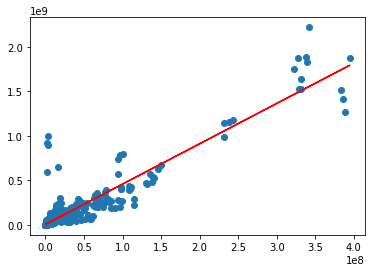

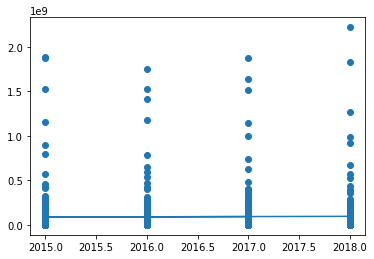

In [30]:
import numpy as np
#Pandas is to store and make functional the data we're going to use
import pandas as pd
#Sklearn is to test whether our method, Standard deviation, is working for finding the best feature(s)
from sklearn import linear_model as lm
import matplotlib.pyplot as plt


#Read in data
taxData = pd.read_csv('/content/sales-and-use-tax.csv')
popData = pd.read_csv('/content/HS-STAT-Population-of-Vermont-towns-1930-2019.csv')

#dropped an ID column
popData = popData.drop('CTC', axis=1)

#Data Engineering step(s)
#Reshaped the data to get ready for merging with the tax data
popData2 = popData.melt(id_vars=['NAME'], var_name="Calendar Year", value_name="Population")

#Changing data type(dtype) for merging
popData2 = popData2.astype({'Calendar Year' : 'int64'})

#Merging datasets into one dataset
DATA = taxData.merge(popData2, left_on=["Town", "Calendar Year"], right_on=["NAME", "Calendar Year"], how='inner')

#Feature we want to predict
TargetFeature = "Gross"
#Separate Features and Target(s)
DATAFeatures = DATA.drop(TargetFeature, axis=1)

#Data Mining Steps - Using standard deviation
MostImportantFeature = DATAFeatures.std().sort_values(ascending=False)[0:1]
LeastImportantFeature = DATAFeatures.std().sort_values()[0:1]

#Final Data Engineering Steps
#Find most important feature, by our Data mining methodology
FeatureName = MostImportantFeature.index[0]


#Testing our choice from Data Mining Results
#Setting up input arrays for test

xb = np.array(DATA[MostImportantFeature.index[0]])
xb = xb.reshape(-1,1)
yb = np.array(DATA[TargetFeature])
yb = yb.reshape(-1,1)

bestModel = lm.LinearRegression().fit(xb,yb)
BMscore = bestModel.score(xb,yb)

#if the regression score is above threshold use the chosen feature
BestDataModel = pd.DataFrame(DATAFeatures[MostImportantFeature.index[0]])


#Showing the bad case from Data Mining Results
xw = np.array(DATA[LeastImportantFeature.index[0]])
xw = xw.reshape(-1,1)
yw = np.array(DATA[TargetFeature])
yw = yw.reshape(-1,1)

worstModel = lm.LinearRegression().fit(xw,yw)
WMscore = worstModel.score(xw,yw)

print('The Most Important feature, ', MostImportantFeature.index[0],', has an linear regression accuracy of:  ', BMscore, sep="")
print('The Least Important feature, ', LeastImportantFeature.index[0],', has an linear regression accuracy of:  ', WMscore, sep="")
print('\nThe best data model is:  \n', BestDataModel.head())

yb_pred = bestModel.predict(xb)
yw_pred = worstModel.predict(xw)

plt.figure(0)
plt.scatter(xb, yb)
plt.plot(xb, yb_pred, color='red')

plt.figure(1)
plt.scatter(xw, yw)
plt.plot(xw, yw_pred)